# Breast cancer diagnostic

### Importing libraries

In [20]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

from PIL import Image
print(Image.__file__)

2.3.0
D:\Users\razva\anaconda3\envs\tf\lib\site-packages\PIL\Image.py


In [21]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [22]:
import Image
print(Image.__file__)

D:\Users\razva\anaconda3\envs\tf\lib\site-packages\PIL\Image.py


## Data Preprocessing

### Training set

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('BreastsData/training_set',
                                                 target_size = (160, 160),
                                                 batch_size = 32,
                                                 color_mode='grayscale',
                                                 class_mode = 'categorical')

Found 345 images belonging to 3 classes.


### Test set

In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('BreastsData/test_set',
                                            target_size = (160, 160),
                                            batch_size = 32,
                                            color_mode='grayscale',
                                            class_mode = 'categorical')

Found 71 images belonging to 3 classes.


## Building the CNN

In [25]:
cnn = tf.keras.models.Sequential()

### Convolution

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[160, 160, 1]))

### Pooling

In [27]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### The second convolutional layer

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### The third convolutional layer

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Flattening

In [30]:
cnn.add(tf.keras.layers.Flatten())

## Full connection with the ANN

### The first Dense layer

In [31]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### The second Dense layer

In [32]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [33]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 158, 158, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 77, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)            

### Output Layer

In [34]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Training the CNN

### Compiling the CNN

In [35]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy',tf.keras.metrics.Precision()])

In [36]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
11/11 [==============================] - 4s 375ms/step - loss: 1.0420 - accuracy: 0.4841 - precision_1: 0.5606 - val_loss: 0.9438 - val_accuracy: 0.6056 - val_precision_1: 0.9474
Epoch 2/50
11/11 [==============================] - 4s 340ms/step - loss: 0.9508 - accuracy: 0.4899 - precision_1: 0.6581 - val_loss: 0.8598 - val_accuracy: 0.6197 - val_precision_1: 0.8235
Epoch 3/50
11/11 [==============================] - 4s 378ms/step - loss: 0.8513 - accuracy: 0.6203 - precision_1: 0.7439 - val_loss: 0.9368 - val_accuracy: 0.5634 - val_precision_1: 0.6383
Epoch 4/50
11/11 [==============================] - 4s 379ms/step - loss: 0.8728 - accuracy: 0.5681 - precision_1: 0.6927 - val_loss: 0.7621 - val_accuracy: 0.7183 - val_precision_1: 0.7736
Epoch 5/50
11/11 [==============================] - 4s 368ms/step - loss: 0.7588 - accuracy: 0.6435 - precision_1: 0.7468 - val_loss: 0.7966 - val_accuracy: 0.6338 - val_precision_1: 0.8378
Epoch 6/50
11/11 [==============================] 

Epoch 44/50
11/11 [==============================] - 5s 409ms/step - loss: 0.0904 - accuracy: 0.9565 - precision_1: 0.9565 - val_loss: 0.5074 - val_accuracy: 0.8732 - val_precision_1: 0.8714
Epoch 45/50
11/11 [==============================] - 5s 419ms/step - loss: 0.0850 - accuracy: 0.9681 - precision_1: 0.9681 - val_loss: 0.3639 - val_accuracy: 0.8873 - val_precision_1: 0.8857
Epoch 46/50
11/11 [==============================] - 5s 414ms/step - loss: 0.0531 - accuracy: 0.9855 - precision_1: 0.9855 - val_loss: 0.4525 - val_accuracy: 0.8873 - val_precision_1: 0.8873
Epoch 47/50
11/11 [==============================] - 5s 419ms/step - loss: 0.0521 - accuracy: 0.9797 - precision_1: 0.9797 - val_loss: 0.6281 - val_accuracy: 0.8310 - val_precision_1: 0.8310
Epoch 48/50
11/11 [==============================] - 4s 392ms/step - loss: 0.0958 - accuracy: 0.9594 - precision_1: 0.9594 - val_loss: 0.4544 - val_accuracy: 0.8592 - val_precision_1: 0.8592
Epoch 49/50
11/11 [==========================

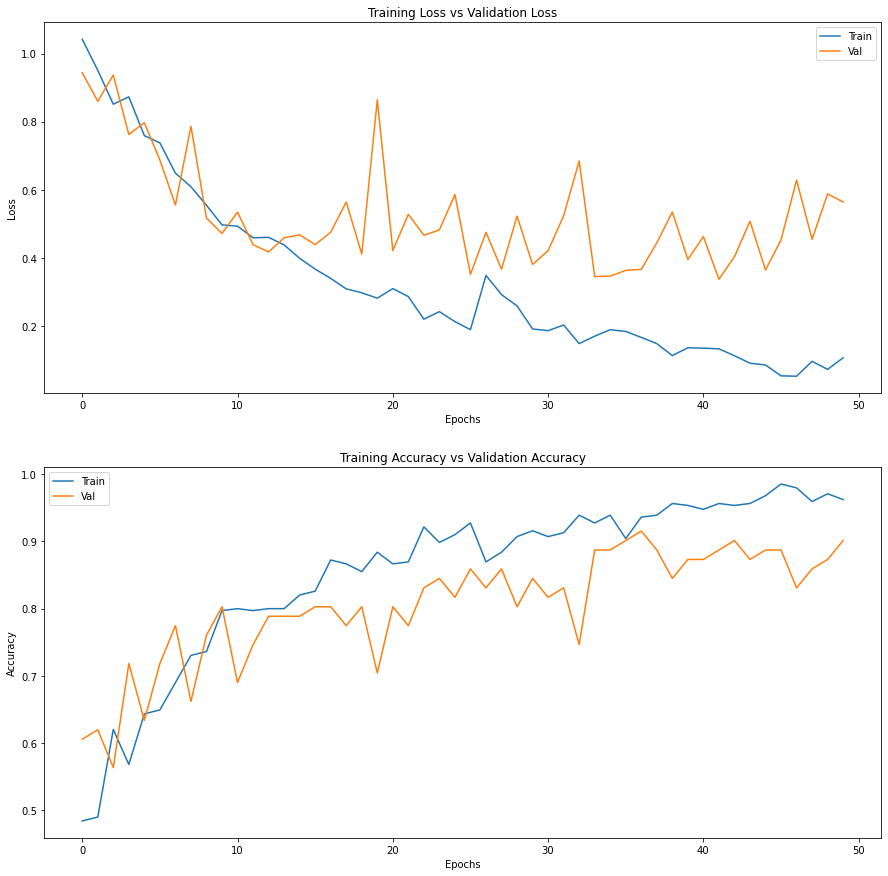

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [38]:
training_set.class_indices

{'benign': 0, 'cancer': 1, 'normal': 2}

# Making one prediction


In [39]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('BreastsData/test_set/cancer/c30204.png', target_size = (160, 160),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices


the_result = -1
value=float('-inf')

for i in range(len(result[0])):  
    if result[0][i]-value>0.00001: 
        the_result = i
        value = result[0][i]

if the_result == 0:
    prediction = 'benign'
elif the_result:
    prediction = 'cancer'
else: 
    prediction = 'normal'
    

In [40]:
print(prediction)

cancer
